ALL IMPORTS ARE BEING STORED HERE .

In [1]:
import hashlib
import sys
import matplotlib.pyplot as plt
import numpy as np

A) Create a hash table data structure. Make this a class in python. It should
have the array A, which should be a python list of sized m for some user-speci
ed value of m, specified when the class is instantiated. Each position of this
list should also store another python list as the chain of elements which are
mapped to this bucket. You can choose the prime number to be p = 524287.
Use random library in python to choose a as specified in class and then create
the function such that it hashes element x to ha(x) = ((ax) mod p) mod
m.

We have to implement the above hash table data structure class which is the normal linked list type of data structure in a hash table . 

So , i will also be doing error handling in this class for better performance and the required checks .

In [2]:
import random ; 

class HashTableDS: 
  
  # setting the default size of the hash table to 16 and the prime number to 524287 . 
  def __init__(self , hash_function_used ,  size: int=16 , prime: int=524287):
    
    if (size <= 0):
      print("The size of the hash table shpuld be greater than 0") ; 
    
    self.m = size ; 
    self.p = prime ; 
    
    # print(size) ; 
    
    self.A = [] ; 
    for i in range(self.m):
      self.A.append([]) ; # initializing the hash table with m linked lists . 
      
    self.a = random.randint(1 , self.p - 1) ; # we select a from 1 to (p-1) as given in the slides 
    
    self.hash_function_used = hash_function_used ; 
    
  def hash_function_value(self , x): 
    
    if (self.hash_function_used == "universal"):
    # this will return hashed value for the function . 
    
      return (((self.a * x) % self.p) % self.m) ; 

    elif (self.hash_function_used == "random"):
      
      return int(self.m * (random.random()) ) ; 
     
      
  def insert_element(self , x):   
    
    
    hashing_index = self.hash_function_value(x) ; 
    
    self.A[hashing_index].append(x) ; 
    
    
  def search_element(self, x ): 
    
    index = self.hash_function_value(x) ; 
    
    if x in self.A[index]:
      
      return True ; 
    
    else:
      return False ; 
    
  def delete_element(self , x): 
    index = self.hash_function_value(x) ; 
    if x in self.A[index]: 
      self.A[index].remove(x) ; 
      
      return True ; 
    
    return False ; 
  
  
  def get_linked_lists(self): 
    for i in range(self.m): 
      if (len(self.A[i]) > 0): 
        print(f"Bucket{i} elements :  {self.A[i]}") ;     
        
    
  def max_bucket_size(self): 
    
    max_size = 0 ; 
    for i in range(self.m): 
      max_size = max(max_size , len(self.A[i])) ; 
      
    return max_size ; 
  
  def min_bucket_size(self): 
    
    min_size = min(len(x) for x in self.A ) ;
    
    return min_size ;  
 

B) We will experiment with a hash function that maps strings to buckets. Con-
sider the data file word.txt. We will use the md5 hash function to create a

hashtable from this. You can read how to use the md5 library in here. Use the
hexdigest() method and then take the last 4 digits. This will create a hash
function that maps any string into an index between 0 and 16^4 = 65536. For
each string in the input file, output the hash value.

So we need to use hexdigest() method , this takes the last 4 digits of the hexadecimal notation , thus the value can be from 0 to 15 , thus total number of indexes are from 0 to 16^4 = 2^16 = 65536 .

In [ ]:
# hash_example = HashTableDS() ; 

# hash_func = hashlib.shake_256(b'Nobody inspects the spammish repetition') ; 

# hash_func.hexdigest(20) ; 


with open(r"words.txt" , 'r') as file1 :
  
  words = file1.readlines() ; 
  
hash_values_stored = [] ; 

for i in range(len(words)): 
  hash_value = hashlib.md5(words[i].encode()).hexdigest() ;  
  
  hash_value = hash_value[len(hash_value) - 4:] ; 
  
  hash_value = int(hash_value , 16) ; 
  
  hash_values_stored.append(hash_value) ;

# print(hash_values_stored) ;  



  

Thus we converted the values into encoding using the above approach , now we can test for these . 

C) We will experiment with the maximum chain length for two hash functions.
The first one is the universal hash function you created in problem (a). The

second one is a random hash function, which you can create as the following
line of Python code for a given value x. We will store the targets of this random
hash function in a python dictionary as h[x] = int(m * random.random()),
where h[x] is the bucket index of the table where x should be stored. Choose m
= 500000. Now, for each of the two hash functions, calculate the hash bucket
index for all numbers in 1, . . . , m, and find out the maximum and minimum
number of elements in a bucket. Do this experiment 5 times for each of the
hash functions. Present your result in a table or bar graph. Which of these
hash functions has more of a difference between the maximum and minimum
chain?

First using the universal hash function , we have the following : 

In [4]:
m = 500000 ; 

def universal_hashing(m): 
  
  hash_table = HashTableDS("universal" , m) ; 
  
  for i in range(1 , m + 1): # including the last element . 
    hash_table.insert_element(i) ; 
    
  return hash_table  ; 

hash_table_universal = universal_hashing(m)  

print(hash_table_universal.max_bucket_size()) 

print(hash_table_universal.min_bucket_size()) ; 



2
0


Secondly using the random hash function, we have the following : 

In [5]:
m = 500000 ; 

def random_hashing(m): 
  
  hash_table = HashTableDS("random" , m) ; 
  
  for i in range(1 , m + 1): # including the last element . 
    hash_table.insert_element(i) ; 
    
  return hash_table  ; 

hash_table_random = random_hashing(m)  

print(hash_table_random.max_bucket_size()) 

print(hash_table_random.min_bucket_size()) ; 


8
0


Now we can see that the difference between the maximum and minimum number of elements in a buckets in the case of universal function is way less than in the case of random hash function . 

Now lets run the code for 5 times and plot the graphs for the same . 

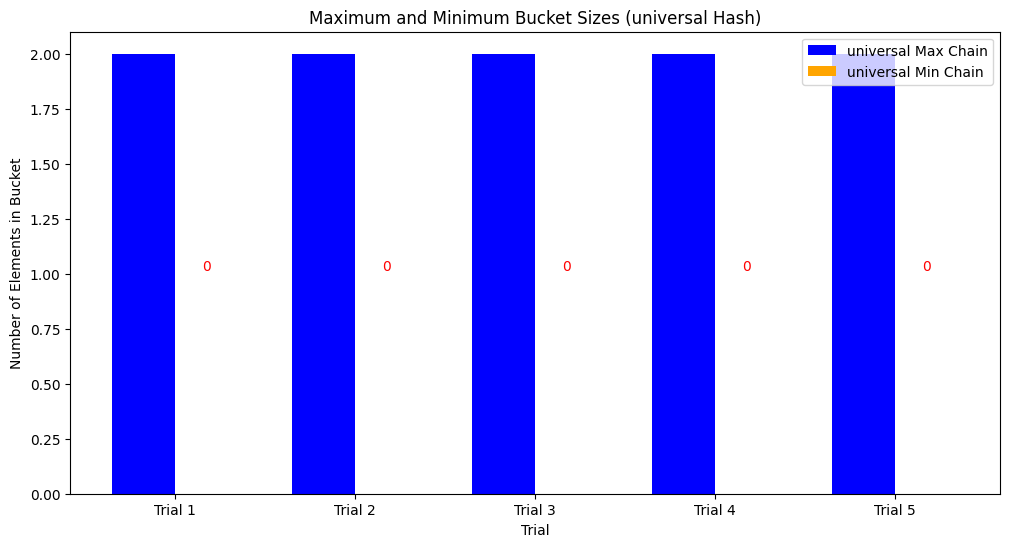

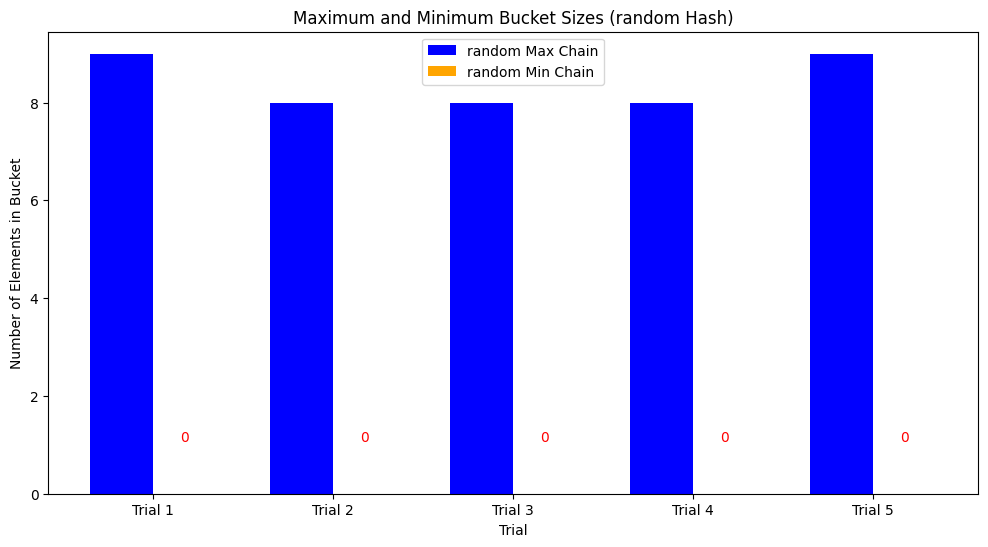

In [6]:
def plot_max_min_bar(max_values, min_values, hash_function_used):
    trials = range(1, len(max_values) + 1)
    bar_width = 0.35  
    index = np.arange(len(trials))  

    plt.figure(figsize=(12, 6))
    
    max_bars = plt.bar(index, max_values, bar_width, label=f"{hash_function_used} Max Chain", color="blue")
    min_bars = plt.bar(index + bar_width, min_values, bar_width, label=f"{hash_function_used} Min Chain", color="orange")
    
    for i, (min_val, min_bar) in enumerate(zip(min_values, min_bars)):
        if min_val == 0:
            plt.text(min_bar.get_x() + min_bar.get_width() / 2, 1, '0', ha='center', va='bottom', color='red', fontsize=10)
    
    plt.xlabel("Trial")
    plt.ylabel("Number of Elements in Bucket")
    plt.title(f"Maximum and Minimum Bucket Sizes ({hash_function_used} Hash)")
    plt.xticks(index + bar_width / 2, [f"Trial {i}" for i in trials]) 
    plt.legend()
    plt.show()

  
  
def universal_hash_plot(m): 
  max_values = [] ; 
  min_values = [] ; 
  
  number_of_times = 5 ; 
  for i in range(number_of_times): 
    hash_table = universal_hashing(m) ; 
    max_values.append(hash_table.max_bucket_size()) ; 
    min_values.append(hash_table.min_bucket_size()) ; 
    
  plot_max_min_bar(max_values , min_values , "universal") ; 
  
def random_hash_plot(m):
  max_values = [] ; 
  min_values = [] ; 
  
  number_of_times = 5 ; 
  for i in range(number_of_times): 
    hash_table = random_hashing(m) ; 
    max_values.append(hash_table.max_bucket_size()) ; 
    min_values.append(hash_table.min_bucket_size()) ; 
    
  plot_max_min_bar(max_values , min_values , "random") ; 
     
m = 500000 ; 
universal_hash_plot(m) ; 

random_hash_plot(m) ;  

(d) Use Flajolet-Martin to estimate the number of unique words in the list. Con-
sider the id of every word as the last 4 digits as used in problem (b) and use the

universal hashing of problem (a) with m = 500000 to compute the hash values
of every id. Compute the trailing zeroes of every hash function and maintain
the largest trailing zeros as z until the end of the ids. Finally, return 2
z+1/2
.

We need to use the id of the words which wed got in the part b of this question 

In [7]:
# print(hash_values_stored[0]);  


def compute_trailing_zeros(m , hash_values_stored):
  new_hashed_values = [] ; 
  hash_table = HashTableDS("universal", m) ; 
  
  for i in range(len(hash_values_stored)): 
    new_val = hash_table.hash_function_value(hash_values_stored[i]) ; 
    new_hashed_values.append(new_val) ; 
    
  max_trailing_zeros = 0 ; # this is to find the maximum trailing zeros in the binary representation of the hash values . 
  
  for i in range(len(new_hashed_values)): 
    trailing_zeros = 0 ; 
    
    while (new_hashed_values[i] % 2 == 0): 
      if (new_hashed_values[i] == 0):
        break ; 
      
      trailing_zeros += 1 ; 
      new_hashed_values[i] = new_hashed_values[i] // 2 ; 
      
    max_trailing_zeros = max(max_trailing_zeros , trailing_zeros) ; 
    
  return max_trailing_zeros ; 

m = 500000 ; 

# print(compute_trailing_zeros(m , hash_values_stored)) ; 
    
  
  

In [8]:
get_power = compute_trailing_zeros(m , hash_values_stored) ; 

print(get_power)
print(pow(2 , (get_power + 1/2))) ; 

18
370727.60009473265


In [9]:
unique_words = set(hash_values_stored)  # Use a set to automatically store unique words
print(len(unique_words))  # Print the count of unique words


65237
